In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
np.set_printoptions(threshold=sys.maxsize)

## Text Analysis

Set path = $(annotation directory) to read training and validation annotations

In [3]:
path = "/content/drive/MyDrive/dataset/epic-kitchens-100-annotations-master/"
# path = "/content/drive/MyDrive/datasets/epic-kitchens-100-annotations-master/"  # directory where the annotation files are stored
train_path = path + "EPIC_100_train.csv"
val_path = path + "EPIC_100_validation.csv"

train = pd.read_csv(train_path, sep=',')
val = pd.read_csv(val_path, sep=',')

Visualization helper using Matplotlib

In [4]:
def visualize(X, Y, X_label, Y_label, X_rotation, i, x_font_size, y_font_size, title_font_size, plot_dim):
  plt.subplot(plot_dim[0], plot_dim[1],i)
  clist = [(0, "lightcoral"), (0.3, "thistle"), 
         (0.7, "lightsteelblue"), (1, "steelblue")]
  my_cmap = mcolors.LinearSegmentedColormap.from_list("", clist)
  N = len(X)
  x = np.arange(N).astype(float)
  plt.bar(range(len(X)), Y, tick_label=X, width=0.8, color=my_cmap(x/N))
  plt.xticks(rotation=X_rotation, fontsize=x_font_size)
  plt.yticks(fontsize=y_font_size)
  plt.xlabel(X_label, fontsize=title_font_size)
  plt.ylabel(Y_label, fontsize=title_font_size)

Perform frequency counting of verb and noun classes (in number of narrations)

In [ ]:
def count_freq(data, dataset_type, axs, i, num_column, word_type, plot_dim):
  word, count = np.unique(data, return_counts=True)
  word = np.reshape(np.array(word), (-1,1))
  count = np.reshape(np.array(count), (-1,1))
  word_dict = np.hstack((word, count))
  title = word_type + " classes in " + dataset_type + " set"
  df = pd.DataFrame(word_dict, columns=['class', 'frequency'])
  df = df.sort_values(by=['frequency'], ascending=False)
  df1 = df.head(num_column)
  classes = df1['class'].to_numpy()
  freq = df1['frequency'].to_numpy()
  threshold = freq[0] / 15
  tail_class = len(freq[freq < threshold])
  tail_percent = np.sum(freq[freq < threshold]) / np.sum(freq) * 100
  print("Each {} class appears {:.2f} times on average with standard deviation {:.2f}. The most frequent {} class is {} ({}) and the least frequent is {} ({}).".format(word_type, np.sum(freq) / len(classes), np.std(freq), word_type, classes[0], freq[0], classes[-1], freq[-1]))
  print("There are {} classes (which accounts for {:.2f}% of total {}) with fewer than {:.2f} tail threshold frequency.".format(tail_class, tail_percent, word_type, threshold))
  visualize(classes, freq, title, "Number of narrations", 90, i, 10, 20, 25, plot_dim)

  d = dict()
  for i in range(word_dict.shape[0]):
    d[word_dict[i][0]] = word_dict[i][1]
  return d

Each Verb class appears 1314.18 times on average with standard deviation 2829.13. The most frequent Verb class is 0 (14848) and the least frequent is 55 (73).
There are 37 classes (which accounts for 13.02% of total Verb) with fewer than 989.87 tail threshold frequency.
Each Verb class appears 190.60 times on average with standard deviation 398.48. The most frequent Verb class is 0 (1937) and the least frequent is 71 (9).
There are 37 classes (which accounts for 11.67% of total Verb) with fewer than 129.13 tail threshold frequency.


<Figure size 432x288 with 0 Axes>

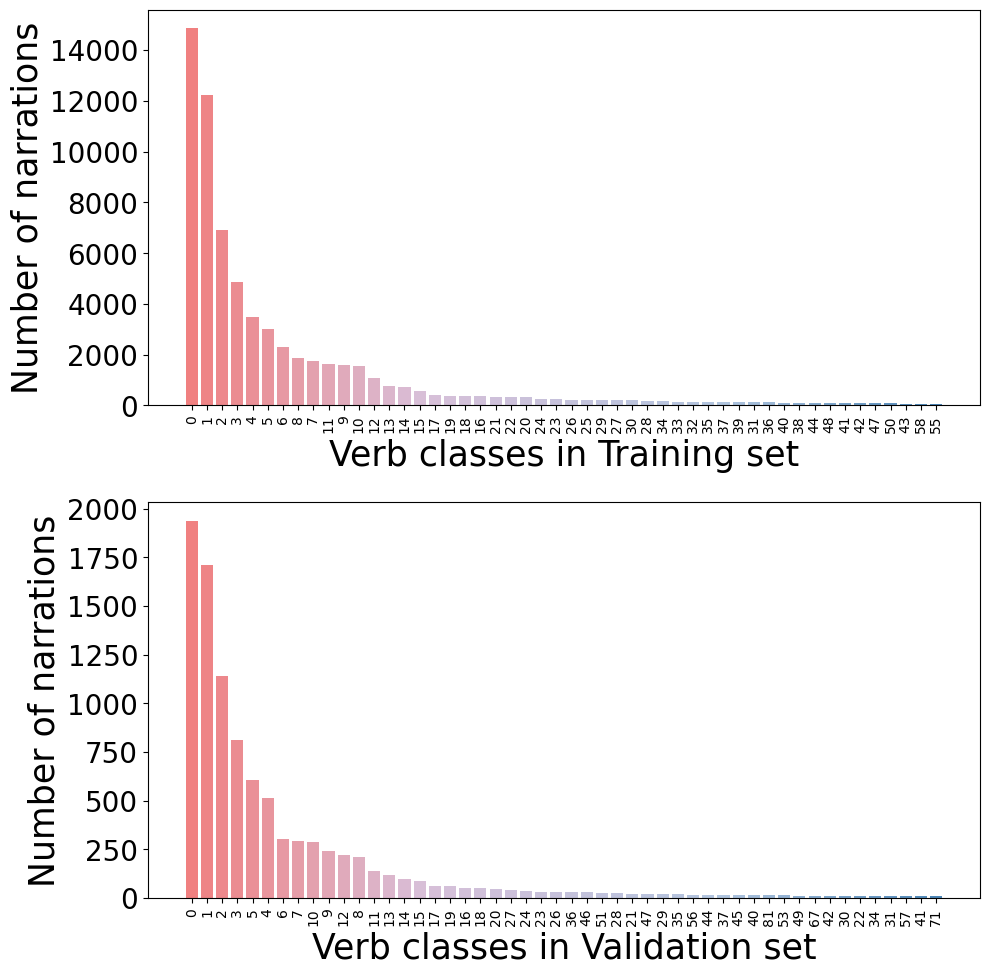

In [ ]:
# Frequency counting for verb classes
plt.clf()
plt.rcParams['axes.labelsize'] = 15
plot_dim = (2,1)
v_fig, v_axs = plt.subplots(plot_dim[0], plot_dim[1], figsize=(10,10), dpi=100)
train_verb = count_freq(train['verb_class'], 'Training', v_axs, 1, 50, "Verb", plot_dim)
val_verb = count_freq(val['verb_class'], 'Validation', v_axs, 2, 50, "Verb", plot_dim)
v_fig.tight_layout()
plt.savefig("verb_count.png")
plt.show()

Each Noun class appears 1003.56 times on average with standard deviation 689.74. The most frequent Noun class is 0 (3617) and the least frequent is 54 (389).
There are 0 classes (which accounts for 0.00% of total Noun) with fewer than 241.13 tail threshold frequency.
Each Noun class appears 148.68 times on average with standard deviation 94.48. The most frequent Noun class is 2 (430) and the least frequent is 77 (58).
There are 0 classes (which accounts for 0.00% of total Noun) with fewer than 28.67 tail threshold frequency.


<Figure size 432x288 with 0 Axes>

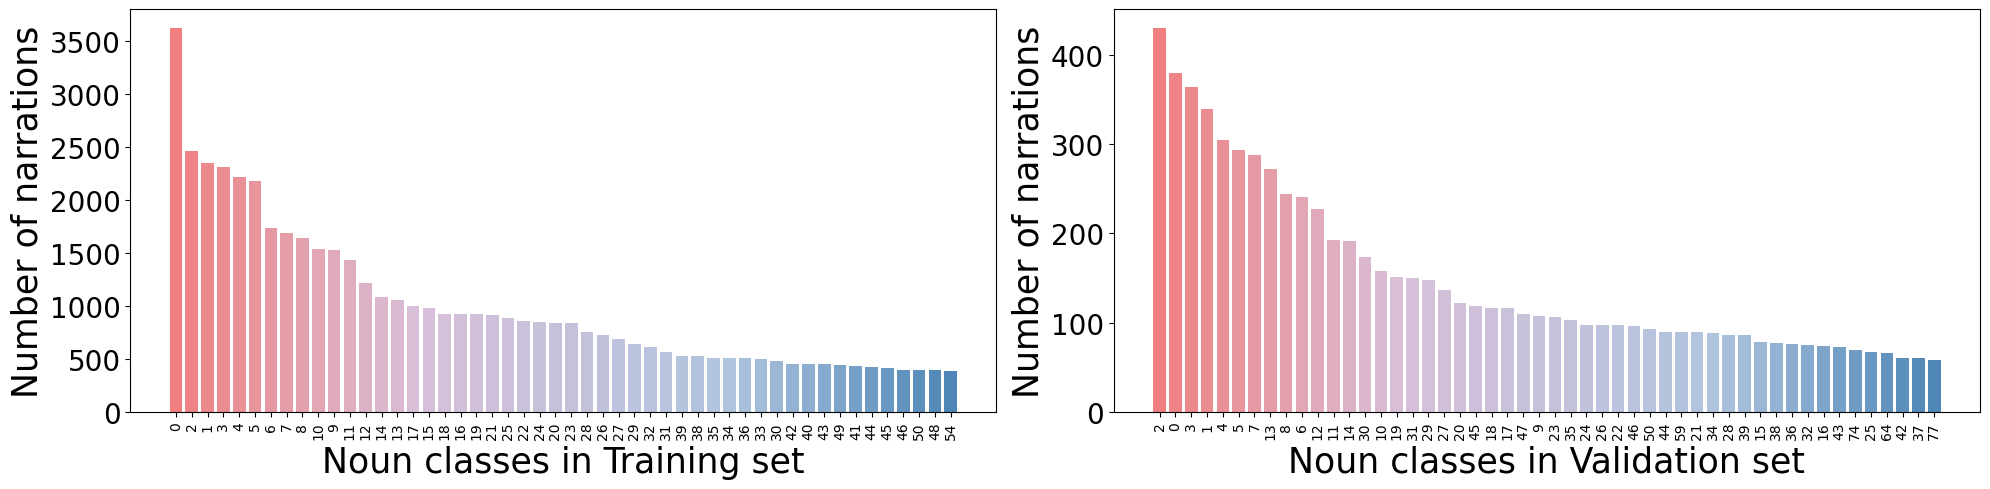

In [ ]:
# Frequency counting for noun classes
plt.clf()
plt.rcParams['axes.labelsize'] = 15
plot_dim = (1,2)
n_fig, n_axs = plt.subplots(plot_dim[0], plot_dim[1], figsize=(20,5),dpi=100)
train_noun = count_freq(train['noun_class'], 'Training', n_axs, 1, 50, "Noun", plot_dim)
val_noun = count_freq(val['noun_class'], 'Validation', n_axs, 2, 50, "Noun", plot_dim)
n_fig.tight_layout()
plt.savefig("noun_count.png")
plt.show()

Count out-of-vocabulary (OOV) verb and noun classes in training and validation

In [ ]:
OOVV = {k:v for k,v in val_verb.items() if k not in train_verb} # number of OOV verb classes
OOVN = {k:v for k,v in val_noun.items() if k not in train_noun} # number of OOV noun classes
print("A total of {} verb classes and {} noun classes are not present in training data. ".format(len(OOVV), len(OOVN)))
v1, v2 = sum(OOVV.values()), sum(train_verb.values()) + sum(val_verb.values())
n1, n2 = sum(OOVN.values()), sum(train_noun.values()) + sum(val_noun.values())
print("A total of {} ({:.2f}%) verbs and {} ({:.2f}%) nouns are not present in training data. ".format(v1, v1/v2*100, n1, n1/n2*100))

A total of 0 verb classes and 4 noun classes are not present in training data. 
A total of 0 (0.00%) verbs and 24 (0.03%) nouns are not present in training data. 


Compute the distribution of sentence length

In [ ]:
def sentence_analysis(data, label):
    sentences = np.copy(data['narration'].to_numpy())
    length = np.zeros(len(sentences), dtype = int)
    for k,v in np.ndenumerate(sentences):
        tmp = v.split()
        sentences[k] = tmp
        length[k] = len(v)

    print("Average sentence length for {} set is {:.1f} with max {}, min {}, standard deviation {:.2f}.".format(label, np.mean(length), length.max(), length.min(), np.std(length)))
    
sentence_analysis(train, "training")
sentence_analysis(val, "validation")

Average sentence length for training set is 15.1 with max 77, min 3, standard deviation 6.32.
Average sentence length for validation set is 14.8 with max 71, min 3, standard deviation 6.00.


Narration missing rate

`val.isnull().sum(axis = 0), train.isnull().sum(axis = 0)` 70, 117 missing narration time stamp

`len(val), len(train)` total length 9668, 67217

In [ ]:
print("{} ({:.3f}%) narration time stamps missing in training set".format(117, 117/67217*100))
print("{} ({:.3f}%) narration time stamps missing in validation set".format(70, 70/9668*100))

117 (0.174%) narration time stamps missing in training set
70 (0.724%) narration time stamps missing in validation set


Overlapping analysis

In [ ]:
# Return a mapping from video_id to an unsorted list of frames
def sort_by_id_start(timestamps):
  timestamps = timestamps[timestamps[:,0].argsort()]
  id = timestamps[0, 0]
  result = dict()
  i = 0
  while (i < len(timestamps)):
    frames = result.get(id, [])
    while (i < len(timestamps) and timestamps[i, 0] == id):
      frames.append(timestamps[i])
      i += 1
    result[id] = frames
    if (i >= len(timestamps)):
      break
    id = timestamps[i, 0]
  return result

# Return the maximum number of narrations with overlapped start/stop timestamp
def max_overlap(timestamps):
  max_count = 0
  max_overlap_set = set()
  for key in timestamps:
    count = 0
    s = set()
    frames = [(frame[1], 0, frame[3]) for frame in timestamps[key]]
    frames.extend([(frame[2], 1, frame[3]) for frame in timestamps[key]])
    frames = sorted(frames)
    for i in range(len(frames)):
      if frames[i][1] == 0:
        count += 1
        s.add(frames[i][2])
      else:
        count -= 1
        s.discard(frames[i][2])
        if count > max_count:
          max_count = count
          max_overlap_set = s.copy()
  return max_count, max_overlap_set

# Convert timestamps to absolute time in second
def conv_time(s):
  return int(s[:2]) * 3600 + int(s[3:5]) * 60 + int(s[6:8]) + int(s[9:11]) / 100

# Count the number of pairs of narrations that overlap
def consecutive_overlap(timestamps, threshold):
  count = 0
  for key in timestamps:
    frames = np.array(timestamps[key])
    frames = frames[frames[:,1].argsort()]
    for i in range(len(frames)-1):
      if frames[i+1][1] < frames[i][2] and conv_time(frames[i][2]) - conv_time(frames[i+1][1]) > threshold:
        count += 1
  return count

# Find the maximum number of narrations in parallel in one video
def overlap_analysis(dataset, dataset_label):
  video_id = dataset['video_id']
  narration_id = dataset['narration_id']
  start_time = dataset['start_timestamp']
  stop_time = dataset['stop_timestamp']
  timestamps = np.hstack((np.array(video_id).reshape((-1,1)), np.array(start_time).reshape((-1,1)), np.array(stop_time).reshape((-1,1)), np.array(narration_id).reshape((-1,1))))
  sorted = sort_by_id_start(timestamps)
  max_count, max_set = max_overlap(sorted)
  consecutive_count1 = consecutive_overlap(sorted, 1)
  print("There're at most {} actions (narration id: {}) at the same time in the {} set.".format(max_count, max_set, dataset_label))
  print("There're {} ({:.2f}%) pairs of consecutive actions overlapped in the {} set.".format(consecutive_count, consecutive_count / len(train_timestamps) * 100, dataset_label))

overlap_analysis(train, "training")
overlap_analysis(val, "validation")

There're at most 4 actions (narration id: {'P01_18_620', 'P01_18_622', 'P01_18_619', 'P01_18_621'}) at the same time in the training set.
There're 3832 (5.70%) pairs of consecutive actions overlapped in the training set.
There're at most 3 actions (narration id: {'P01_14_12', 'P01_14_15', 'P01_14_14'}) at the same time in the validation set.
There're 617 (0.92%) pairs of consecutive actions overlapped in the validation set.


Number of actions per video

Videos in Training set have 135.79 actions in average with standard deviation 167.67. P04_107 has the most actions (940) and P04_15 the least (1).
Videos in Validation set have 70.06 actions in average with standard deviation 93.18. P29_05 has the most actions (564) and P26_30 the least (3).


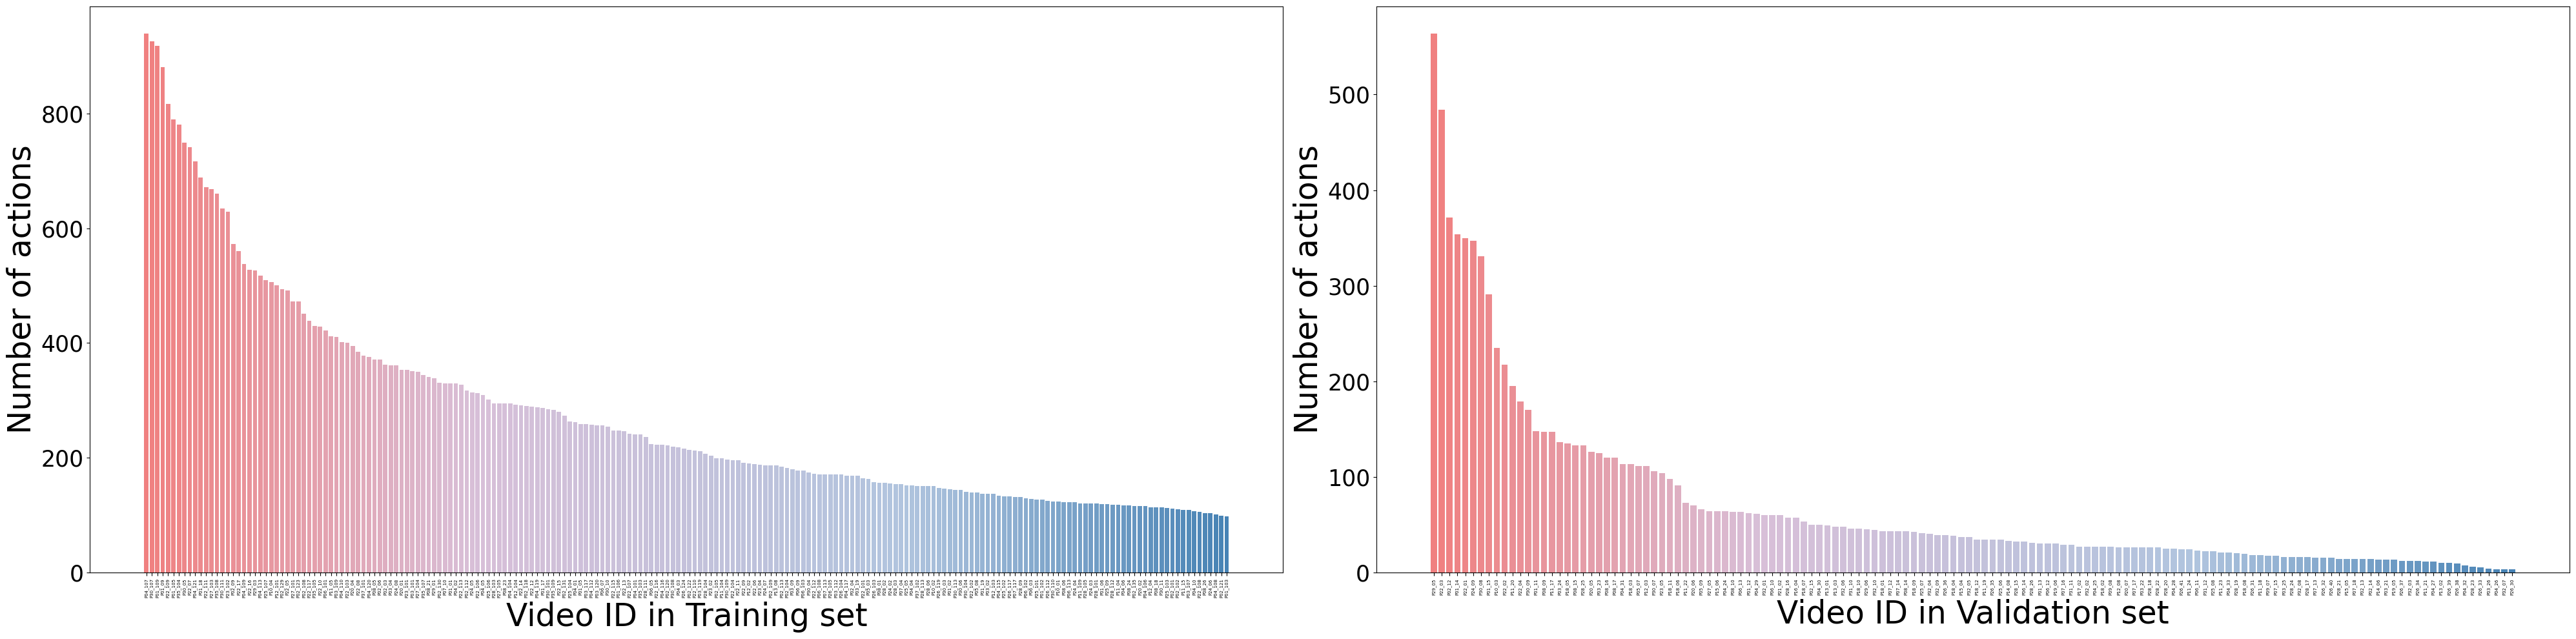

In [ ]:
def count_actions(dataset, dataset_label, threshold, i):
  id, count = np.unique(np.array(dataset['video_id']), return_counts=True)
  actions = np.hstack((np.array(id).reshape(-1,1), np.array(count).reshape(-1,1)))
  actions = actions[actions[:,1].argsort()]
  id = np.array(actions[:, 0]).reshape((1,-1))[0]
  count = np.array(actions[:, 1]).reshape((1,-1))[0]
  print("Videos in {} set have {:.2f} actions in average with standard deviation {:.2f}. {} has the most actions ({}) and {} the least ({}).".format(dataset_label, np.sum(count) / len(id), np.std(count), id[-1], count[-1], id[0], count[0]))
  visualize(np.flip(id)[:threshold], np.flip(count)[:threshold], "Video ID in "+dataset_label+" set", "Number of actions", 90, i, 5, 25, 35)

fig, axs = plt.subplots(1, 2, figsize=(40, 10), dpi=100)
count_actions(train, "Training", 200, 1)
count_actions(val, "Validation", 150, 2)
fig.tight_layout()
plt.savefig("count_action.png")
plt.show()

Count the number of frames for a single verb/noun class

In [34]:
def count_frame_for_word(dataset, dataset_type, label, axs, i, num_column):
  word_type = label[:4]
  label = np.array(dataset[label])
  start_frames = np.array(dataset['start_frame'])
  end_frames = np.array(dataset['stop_frame'])
  num_frames = end_frames - start_frames

  label = label.reshape((-1, 1))
  num_frames = num_frames.reshape((-1,1))
  data = np.hstack((label, num_frames))
  df = pd.DataFrame(data, columns=['verb_class', 'num_frames'])
  df_group = df.groupby('verb_class')['num_frames'].sum()
  df_group = df_group.sort_values(ascending=False)
  df_head = df_group.head(num_column)

  verbs, counts = np.array(df_head.index)[:50], np.array(df_head.values)[:50]
  print("Number of frames for {} class in {}: {} (max), {} (min), {:.2f} (avg), {:.2f} (std).".format(word_type, dataset_type, np.max(counts), np.min(counts), np.average(counts), np.std(counts)))
  visualize(verbs, counts, 'Number of frames for ' + 'verb class in ' + dataset_type, "Number of frames", 90, i, 10, 15, 25, (1,2))

  return df_head

Number of frames for verb class in Training: 2129212 (max), 20165 (min), 225170.22 (avg), 408408.05 (std).
Number of frames for verb class in Validation: 407425 (max), 2702 (min), 42016.20 (avg), 76949.85 (std).


<Figure size 432x288 with 0 Axes>

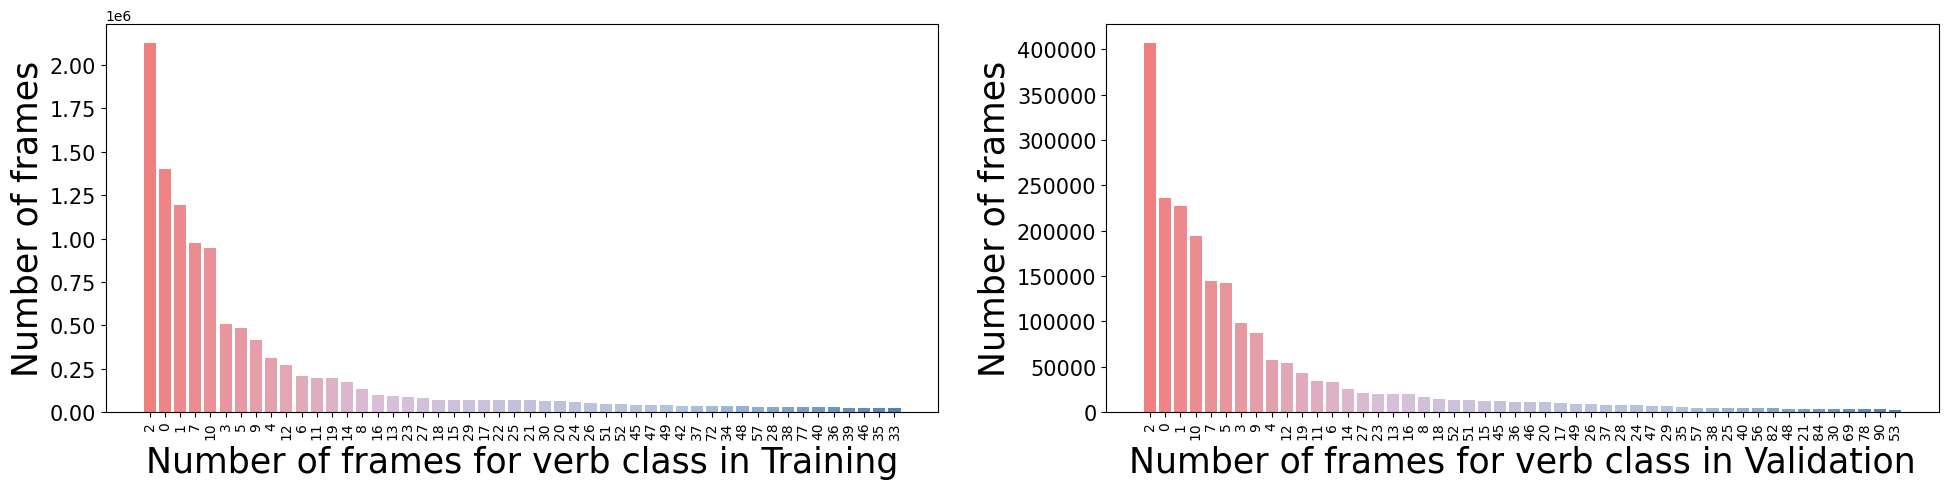

(verb_class
 2     2129212
 0     1402413
 1     1195161
 7      971954
 10     947448
 3      509942
 5      481267
 9      417362
 4      311119
 12     272644
 Name: num_frames, dtype: int64, verb_class
 2     407425
 0     235727
 1     227338
 10    194197
 7     144770
 5     142218
 3      98516
 9      87666
 4      57328
 12     54325
 Name: num_frames, dtype: int64)

In [35]:
plt.clf()
plt.rcParams['axes.labelsize'] = 15
v_fig, v_axs = plt.subplots(2, figsize=(20,5), dpi=100)
train_head = count_frame_for_word(train, 'Training', 'verb_class', v_axs, 1, 100)
val_head = count_frame_for_word(val, 'Validation', 'verb_class', v_axs, 2, 100)
v_fig.tight_layout()
plt.savefig('/content/drive/MyDrive/dataset/data-analysis/figures/total_frame_word.png')
plt.show()

train_head.head(10), val_head.head(10)

In [30]:
# Histogram for video length
def video_length(video, dataset, dataset_type):
  video_ids = np.array(video['video_id']).reshape(-1,1)
  video_dur = np.array(video['duration']).reshape(-1,1)
  video_ids = np.hstack((video_ids, video_dur))
  video_dur = []
  for i in range(len(video_ids)):
    if video_ids[i,0] in dataset:
      video_dur.append(video_ids[i,1])

  print("Video length in {}: {:.2f} (max), {:.2f} (min), {:.2f} (avg), {:.2f} (std).".format(dataset_type, np.max(video_dur), np.min(video_dur), np.average(video_dur), np.std(video_dur)))

  df = pd.DataFrame(video_dur, columns=[''])
  hist = df.hist(bins=100)
  plt.suptitle("Video length in {} set".format(dataset_type), fontsize=18)
  plt.xlabel('Duration', fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.savefig("/content/drive/MyDrive/dataset/data-analysis/figures/video_length_{}.png".format(dataset_type))
  
  return video_dur

Video length in Training: 3708.04 (max), 10.48 (min), 543.26 (avg), 644.57 (std).
Video length in Validation: 1968.60 (max), 11.13 (min), 344.45 (avg), 376.66 (std).


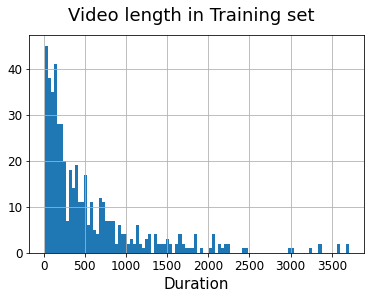

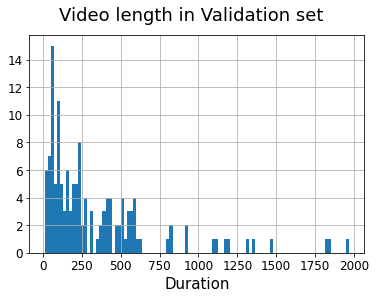

In [31]:
path = "/content/drive/MyDrive/dataset/epic-kitchens-100-annotations-master/"
video_path = path + "EPIC_100_video_info.csv"
video = pd.read_csv(video_path, sep=',')
train_dur = video_length(video, np.array(train['video_id']), 'Training')
val_dur = video_length(video, np.array(val['video_id']), 'Validation')

In [32]:
# Visualize video length vs. number of actions in that video
def length_vs_actions(dataset, dataset_type):
  data = dataset.sort_values(by=['video_id'])
  id, count = np.unique(np.array(data['video_id']), return_counts=True)
  actions = np.hstack((np.array(id).reshape(-1,1), np.array(count).reshape(-1,1)))
  id = np.array(actions[:, 0]).reshape((1,-1))[0]
  count = np.array(actions[:, 1]).reshape((1,-1))[0]

  video_data = video.sort_values(by=['video_id'])

  video_ids = np.array(video_data['video_id'])
  video_dur = np.array(video_data['duration'])
  matched_idx = [x in id for x in video_ids]
  video_dur = video_dur[matched_idx]

  video_dur = video_dur.reshape((-1,1))
  count = count.reshape((-1,1))

  data = np.hstack((video_dur, count))
  df = pd.DataFrame(data, columns=['Duration', 'Number of Actions'])
  df.plot.scatter(x='Duration', y='Number of Actions')
  plt.xlabel('Duration', fontsize=15)
  plt.ylabel('Number of actions', fontsize=15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.suptitle("Video length vs. number of actions in {}".format(dataset_type), fontsize=18)
  plt.savefig("/content/drive/MyDrive/dataset/data-analysis/figures/length_vs_actions_{}.png".format(dataset_type))

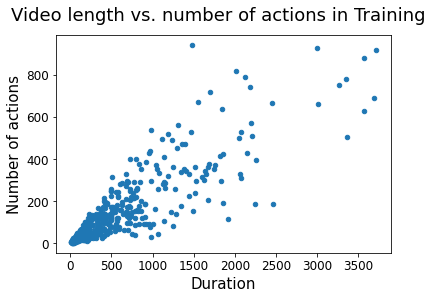

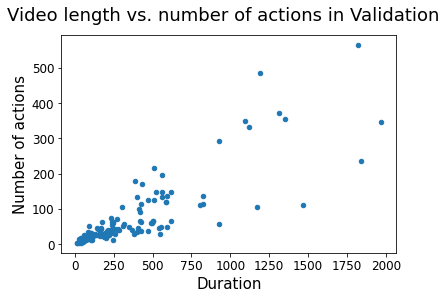

In [33]:
length_vs_actions(train, "Training")
length_vs_actions(val, "Validation")